# Surge Pricing Analysis — Exploratory Data Analysis (EDA)

#### **Objective:**  
- To explore and understand surge pricing patterns based on factors such as demand, supply, time of day, weather conditions, and location.

#### **Goal:**  
- Find insights on what factors influence surge prices and how they vary across cities and time.

In [3]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import os

In [2]:
# For displaying all columns
pd.set_option('display.max_columns', None)

In [34]:
file_path = r"C:\Users\sande\Downloads\surge_pricing_dataset.csv"
df = pd.read_csv(file_path)

In [35]:
print(f"Dataset loaded successfully! Shape: {df.shape}")
df.head()

Dataset loaded successfully! Shape: (200000, 13)


,order_id,order_ts,city,weather,hour,day_of_week,demand_index,supply_index,platform,area_type,surge_multiplier,base_price,final_price
0,1,2023-01-01 00:00:00,Chennai,Sunny,0,Sunday,1.50,0.50,Swiggy,Urban,1.45,189.2,274.3
1,2,2023-01-01 00:01:00,Bangalore,Sunny,0,Sunday,0.98,0.70,Swiggy,Urban,1.23,181.8,223.6
2,3,2023-01-01 00:02:00,Mumbai,Sunny,0,Sunday,0.75,1.44,Zomato,Urban,1.00,291.7,291.7
3,4,2023-01-01 00:03:00,Delhi,Sunny,0,Sunday,1.53,0.94,UberEats,Urban,1.33,189.2,251.6
4,5,2023-01-01 00:04:00,Hyderabad,Sunny,0,Sunday,1.09,0.62,UberEats,Suburban,1.29,185.7,239.6


In [36]:
#  data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   order_id          200000 non-null  int64  
 1   order_ts          200000 non-null  object 
 2   city              200000 non-null  object 
 3   weather           200000 non-null  object 
 4   hour              200000 non-null  int64  
 5   day_of_week       200000 non-null  object 
 6   demand_index      200000 non-null  float64
 7   supply_index      200000 non-null  float64
 8   platform          200000 non-null  object 
 9   area_type         200000 non-null  object 
 10  surge_multiplier  200000 non-null  float64
 11  base_price        200000 non-null  float64
 12  final_price       200000 non-null  float64
dtypes: float64(5), int64(2), object(6)
memory usage: 19.8+ MB


In [37]:
# Check for missing values
print("Missing values per column:")
print(df.isna().sum())

Missing values per column:
order_id            0
order_ts            0
city                0
weather             0
hour                0
day_of_week         0
demand_index        0
supply_index        0
platform            0
area_type           0
surge_multiplier    0
base_price          0
final_price         0
dtype: int64


In [38]:
# Quick summary statistics
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,200000.0,NaN,NaN,NaN,100000.5,57735.171256,1.0,50000.75,100000.5,150000.25,200000.0
order_ts,200000,200000,2023-01-01 00:00:00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
city,200000,5,Hyderabad,49980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weather,200000,3,Sunny,119966,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hour,200000.0,NaN,NaN,NaN,11.4915,6.918408,0.0,5.0,11.0,17.0,23.0
day_of_week,200000,7,Sunday,28800,NaN,NaN,NaN,NaN,NaN,NaN,NaN
demand_index,200000.0,NaN,NaN,NaN,1.150235,0.259532,0.7,0.93,1.15,1.37,1.6
supply_index,200000.0,NaN,NaN,NaN,1.0002,0.288459,0.5,0.75,1.0,1.25,1.5
platform,200000,3,UberEats,79640,NaN,NaN,NaN,NaN,NaN,NaN,NaN
area_type,200000,3,Urban,120327,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
# Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [40]:
# Convert timestamp to datetime (if present)
if 'timestamp' in df.columns:
    df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
    df['hour'] = df['timestamp'].dt.hour
    df['day_of_week'] = df['timestamp'].dt.day_name()
    df['month'] = df['timestamp'].dt.month

In [41]:
# Check unique categorical values
object_cols = df.select_dtypes('object').columns
for col in object_cols:
    print(f"\nColumn: {col}")
    print("Unique Values:", df[col].unique()[:10])


Column: order_ts
Unique Values: ['2023-01-01 00:00:00' '2023-01-01 00:01:00' '2023-01-01 00:02:00'
 '2023-01-01 00:03:00' '2023-01-01 00:04:00' '2023-01-01 00:05:00'
 '2023-01-01 00:06:00' '2023-01-01 00:07:00' '2023-01-01 00:08:00'
 '2023-01-01 00:09:00']

Column: city
Unique Values: ['Chennai' 'Bangalore' 'Mumbai' 'Delhi' 'Hyderabad']

Column: weather
Unique Values: ['Sunny' 'Rainy' 'Cloudy']

Column: day_of_week
Unique Values: ['Sunday' 'Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday' 'Saturday']

Column: platform
Unique Values: ['Swiggy' 'Zomato' 'UberEats']

Column: area_type
Unique Values: ['Urban' 'Suburban' 'Rural']


In [42]:
if 'demand' in df.columns and 'supply' in df.columns:
    df['demand_supply_gap'] = df['demand'] - df['supply']

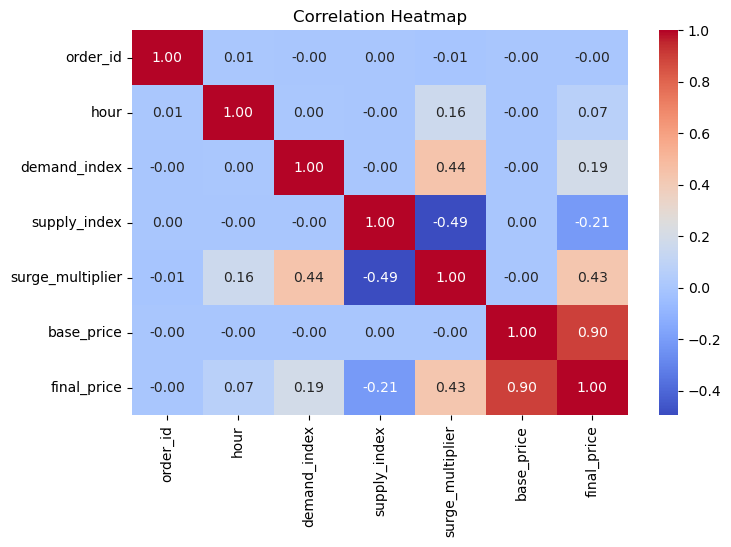

In [43]:
# Correlation matrix (numeric columns only)
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

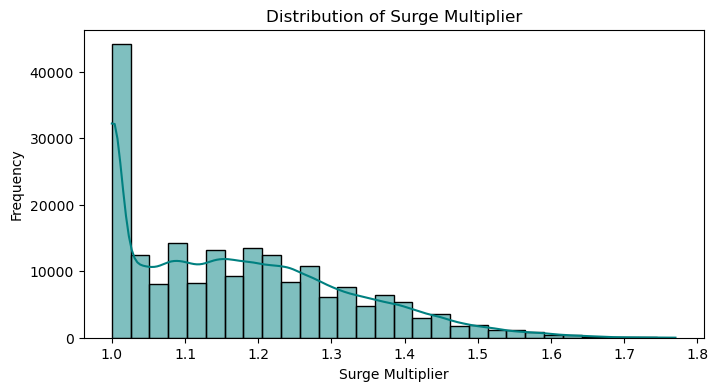

In [44]:
# Distribution of Surge Multiplier
if 'surge_multiplier' in df.columns:
    plt.figure(figsize=(8,4))
    sns.histplot(df['surge_multiplier'], bins=30, kde=True, color='teal')
    plt.title("Distribution of Surge Multiplier")
    plt.xlabel("Surge Multiplier")
    plt.ylabel("Frequency")
    plt.show()

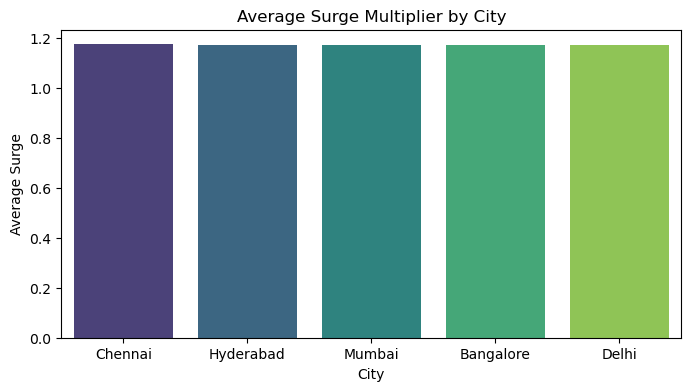

In [45]:
# Average Surge Multiplier by City
if 'city' in df.columns and 'surge_multiplier' in df.columns:
    plt.figure(figsize=(8,4))
    city_avg = df.groupby('city')['surge_multiplier'].mean().sort_values(ascending=False)
    sns.barplot(x=city_avg.index, y=city_avg.values, palette='viridis')
    plt.title("Average Surge Multiplier by City")
    plt.ylabel("Average Surge")
    plt.xlabel("City")
    plt.show()

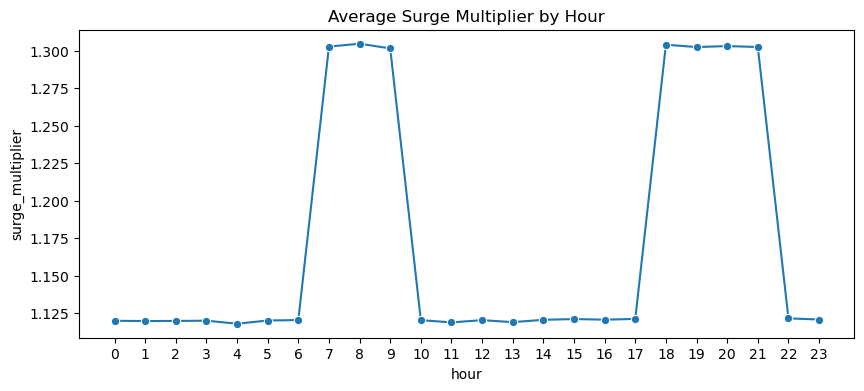

In [46]:
# Surge Multiplier by Hour of the Day
if 'hour' in df.columns and 'surge_multiplier' in df.columns:
    plt.figure(figsize=(10,4))
    hourly = df.groupby('hour')['surge_multiplier'].mean().reset_index()
    sns.lineplot(x='hour', y='surge_multiplier', data=hourly, marker='o')
    plt.title("Average Surge Multiplier by Hour")
    plt.xticks(range(0,24))
    plt.show()

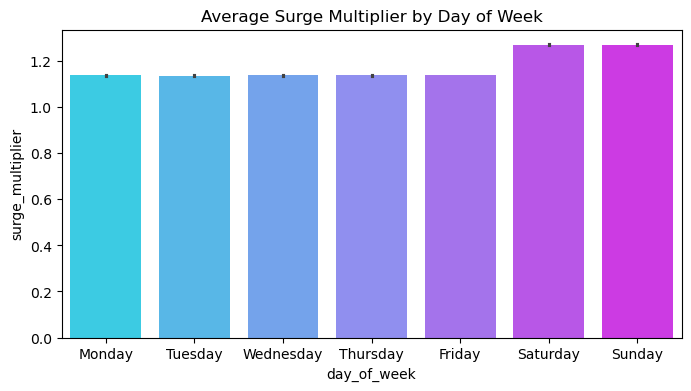

In [47]:
# Surge Multiplier by Day of the Week
if 'day_of_week' in df.columns and 'surge_multiplier' in df.columns:
    plt.figure(figsize=(8,4))
    order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
    sns.barplot(x='day_of_week', y='surge_multiplier', data=df, order=order, palette='cool')
    plt.title("Average Surge Multiplier by Day of Week")
    plt.show()

In [48]:
# Relationship: Demand vs Surge Multiplier
if {'demand','surge_multiplier'}.issubset(df.columns):
    plt.figure(figsize=(7,4))
    sns.scatterplot(x='demand', y='surge_multiplier', data=df, alpha=0.6, color='seagreen')
    plt.title("Demand vs Surge Multiplier")
    plt.show()

In [49]:
# Relationship: Supply vs Surge Multiplier
if {'supply','surge_multiplier'}.issubset(df.columns):
    plt.figure(figsize=(7,4))
    sns.scatterplot(x='supply', y='surge_multiplier', data=df, alpha=0.6, color='orange')
    plt.title("Supply vs Surge Multiplier")
    plt.show()

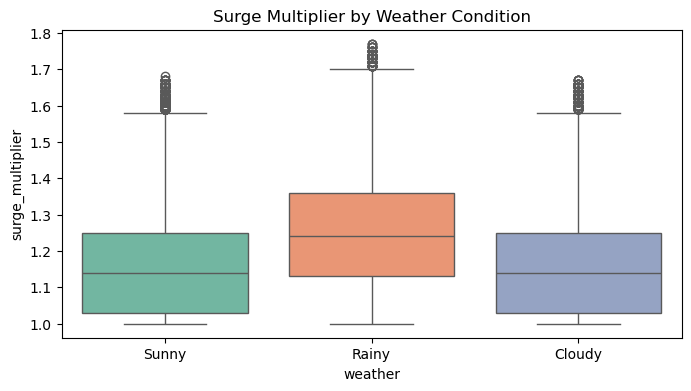

In [50]:
# Surge Multiplier by Weather
if {'weather','surge_multiplier'}.issubset(df.columns):
    plt.figure(figsize=(8,4))
    sns.boxplot(x='weather', y='surge_multiplier', data=df, palette='Set2')
    plt.title("Surge Multiplier by Weather Condition")
    plt.show()

In [51]:
# Average Price by City
if {'city','price'}.issubset(df.columns):
    plt.figure(figsize=(8,4))
    sns.barplot(x='city', y='price', data=df, estimator=np.mean, palette='mako')
    plt.title("Average Price by City")
    plt.ylabel("Average Price")
    plt.xlabel("City")
    plt.show()

In [52]:
if 'hour' in df.columns:
    top_hours = df.groupby('hour')['surge_multiplier'].mean().sort_values(ascending=False).head(10)
    print("Top Hours with Highest Average Surge:")
    print(top_hours)

Top Hours with Highest Average Surge:
hour
8     1.304689
18    1.304025
20    1.303121
7     1.302770
21    1.302494
19    1.302465
9     1.301566
22    1.121477
17    1.121103
15    1.121005
Name: surge_multiplier, dtype: float64


In [53]:
# Quick Insights Summary
print("\nQuick Insights:")
print(f"- Total Records: {df.shape[0]}")
print(f"- Columns: {df.shape[1]}")
if 'city' in df.columns:
    print(f"- Highest Average Surge City: {city_avg.idxmax()} ({city_avg.max():.2f})")
if 'hour' in df.columns:
    print(f"- Peak Surge Hour: {df.groupby('hour')['surge_multiplier'].mean().idxmax()}h")
if 'demand_supply_gap' in df.columns:
    print(f"- Average Demand-Supply Gap: {df['demand_supply_gap'].mean():.2f}")


Quick Insights:
- Total Records: 200000
- Columns: 13
- Highest Average Surge City: Chennai (1.17)
- Peak Surge Hour: 8h


## Summary & Observations
 - **Higher surge multipliers** are usually observed during **peak hours (morning & evening)**.  
- **Rainy or cloudy weather** tends to increase surge prices slightly due to higher demand.  
- **Cities with high demand and low supply** experience more frequent surge pricing.  
- **Surge multipliers** directly impact the final price paid by customers.  